In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 

import mdtraj as md

import numpy as np
from tqdm import tqdm
from pathlib import Path
import os
from natsort import natsorted

In [113]:
protein = 'egfr'
save_dir = Path(f'data_{protein}/plots/')
if not save_dir.exists():
    save_dir.mkdir(exist_ok=True)

In [114]:
f_dunbrack = natsorted([str(d) for d in Path(f'./data_{protein}/ftrajs/').glob('run*-clone*_dbdist.npy')])
traj_lengths = [np.load(path).shape[0] for path in f_dunbrack]

In [116]:
max(traj_lengths)/20

1630.0

In [117]:
total_lengths

array([ 133600.,   15000.,    2400.,    3600.,    4800.,   10800.,
         13200.,   15000.,    8200.,    9000.,       0.,   11000.,
         37400.,   13800.,   43200.,   30600.,   33400.,   17200.,
         54800.,   19200.,   61000.,  193200.,  271000.,  398800.,
        392200.,  559000.,  871800.,  878200.,  825000., 1091200.,
       1001200.,  783400.,  842000.,  834844.,  550400.,  461200.,
        473800.,  336200.,  306600.,  117800.,   40200.,   41400.,
             0.,   43000.])

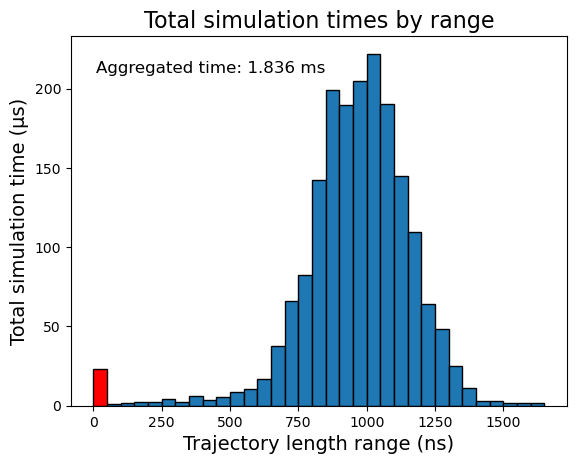

In [118]:
# Trajectories shorter than 1000 * timestep (50 ps) = 50 ns are not used in the MSMs
# Use 50 as the bin width, so the frist bin is excluded 

#bins = np.linspace(0, 2150, 44)
bins = np.linspace(0, 1650, 34)

bin_indices = np.digitize(np.array(traj_lengths)/20, bins)

# Calculate the total length in each bin
total_lengths = np.zeros(len(bins))
for idx, length in zip(bin_indices, traj_lengths):
    total_lengths[idx-1] += length  # Subtract 1 because indices are 1-based

fig, ax = plt.subplots()
bars = ax.bar(bins[:-1], total_lengths[:-1]/20000, width=np.diff(bins), align='edge', edgecolor='black')
bars[0].set_facecolor('red')

ax.set_xlabel('Trajectory length range (ns)', fontsize=14)
ax.set_ylabel('Total simulation time (μs)', fontsize=14)
ax.set_title(f'Total simulation times by range', fontsize=16)
ax.annotate(f'Aggregated time: {np.round(np.sum(traj_lengths)/20000000,3)} ms', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.savefig(save_dir /'total_length_hist.png')
plt.show()

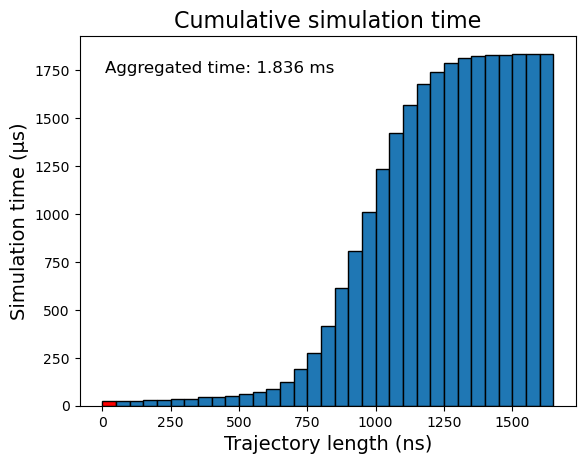

In [119]:
#bins = np.linspace(0, 2150, 44)
bins = np.linspace(0, 1650, 34)

bin_indices = np.digitize(np.array(traj_lengths)/20, bins)

# Calculate the total length in each bin
total_lengths = np.zeros(len(bins))
for idx, length in zip(bin_indices, traj_lengths):
    total_lengths[idx-1] += length  # Subtract 1 because indices are 1-based
cumulative_lengths = np.cumsum(total_lengths)

fig, ax = plt.subplots()
bars = ax.bar(bins[:-1], cumulative_lengths[:-1]/20000, width=np.diff(bins), align='edge', edgecolor='black')
bars[0].set_facecolor('red')

ax.set_xlabel('Trajectory length (ns)', fontsize=14)
ax.set_ylabel('Simulation time (μs)', fontsize=14)
ax.set_title('Cumulative simulation time', fontsize=16)
ax.annotate(f'Aggregated time: {np.round(np.sum(traj_lengths)/20000000,3)} ms', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

plt.savefig(save_dir /'cumulative_length_hist.png')
plt.show()